In [1]:
# 1. 花儿分类
# In this demo, we'll be performing flower classification using a sequential model in keras. We'll
# use our model to classify between 5 different types of flowers

In [1]:
# 2. Code
# 各种import
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn

2024-04-24 01:38:23.984796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# tqdm就是一个progressbar应用
from tqdm import tqdm
import os
from random import shuffle

In [3]:
# 构建训练数据集
train_datagen = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                   samplewise_center=False,
                                   featurewise_std_normalization=False,
                                   samplewise_std_normalization=False,
                                   zca_whitening=False,
                                   rotation_range=10,
                                   zoom_range=0.1,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False)
training_set = train_datagen.flow_from_directory('dataset/train',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                classes=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])

Found 3458 images belonging to 5 classes.


In [4]:
# 读取test_set
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('dataset/validation',
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical',
                                           classes=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])


Found 865 images belonging to 5 classes.


In [5]:
# set random seed
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [67]:
# 模型
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation='softmax'))

In [68]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 56, 56, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     9,634,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,796,229 (37.37 MB)

 Trainable params: 9,796,229 (37.37 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
epochs = 8

# 定义一个回调函数来保存验证集上表现最好的模型
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_acc',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)


history = model.fit(training_set,
                   steps_per_epoch=3458// 32,         
                   epochs=epochs,
                   validation_data=test_set,
                   callbacks=[checkpoint_callback])

Epoch 1/8
108/108 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.6487 - loss: 0.8868 - val_accuracy: 0.6162 - val_loss: 0.9924
Epoch 2/8
  1/108 ━━━━━━━━━━━━━━━━━━━━ 2:33 1s/step - accuracy: 0.7812 - loss: 0.5345

2024-04-24 03:37:59.495295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.7812 - loss: 0.5345 - val_accuracy: 0.6162 - val_loss: 0.9916
Epoch 3/8
108/108 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.6892 - loss: 0.8109 - val_accuracy: 0.6150 - val_loss: 1.0618
Epoch 4/8
  1/108 ━━━━━━━━━━━━━━━━━━━━ 2:47 2s/step - accuracy: 0.6250 - loss: 0.9333

2024-04-24 03:41:23.738919: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.6250 - loss: 0.9333 - val_accuracy: 0.6197 - val_loss: 0.9828
Epoch 5/8
108/108 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7067 - loss: 0.7717 - val_accuracy: 0.6509 - val_loss: 0.8955
Epoch 6/8
  1/108 ━━━━━━━━━━━━━━━━━━━━ 2:41 2s/step - accuracy: 0.7500 - loss: 0.8572

2024-04-24 03:44:48.908571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.7500 - loss: 0.8572 - val_accuracy: 0.6590 - val_loss: 0.8926
Epoch 7/8
108/108 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.7061 - loss: 0.7504 - val_accuracy: 0.6382 - val_loss: 0.9913
Epoch 8/8
  1/108 ━━━━━━━━━━━━━━━━━━━━ 2:40 2s/step - accuracy: 0.8438 - loss: 0.7127

2024-04-24 03:48:34.723282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.8438 - loss: 0.7127 - val_accuracy: 0.6347 - val_loss: 0.9886


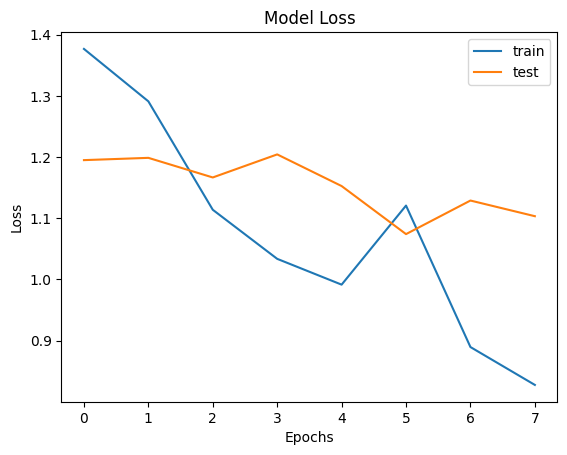

In [71]:
# 差不多到 5 的时候，train loss和test loss重合了，
# 再训练就会产生 bias了，
# 就过拟合了。
# 就使用epoch = 5的模型就行了

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])

In [72]:
batch_x, batch_y = next(test_set) 

In [58]:
batch_x.shape, batch_y.shape

((32, 224, 224, 3), (32, 5))

In [73]:
y_test = tf.argmax(batch_y, axis=1)
y_test

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([2, 4, 2, 2, 2, 4, 1, 2, 4, 2, 0, 2, 0, 3, 0, 2, 2, 0, 1, 1, 4, 4,
       3, 4, 1, 4, 2, 4, 2, 0, 2, 3])>

In [74]:
y_pred = model.predict(batch_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


In [75]:
preds = tf.argmax(y_pred, axis=1)
preds

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([2, 3, 2, 2, 0, 2, 3, 1, 4, 2, 0, 4, 0, 0, 0, 4, 2, 1, 1, 1, 4, 4,
       3, 1, 3, 4, 4, 3, 4, 0, 4, 3])>

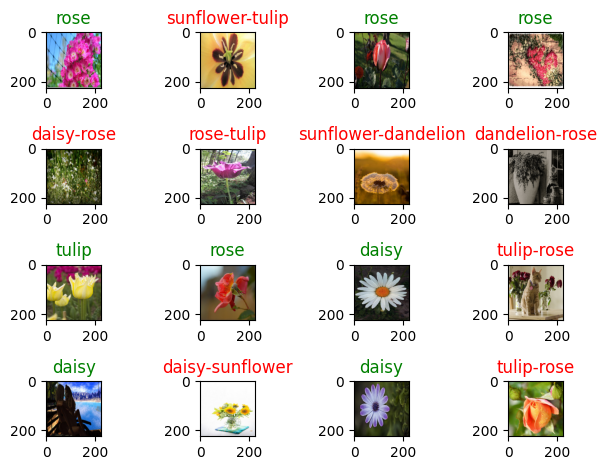

In [76]:
class_indices = [ (v, k) for (k, v) in training_set.class_indices.items()]

plt.figure()
for i in range(1,17):
    plt.subplot(4,4,i)
    label_i = int(y_test[i-1])
    predict_i = int(preds[i-1])
    color_ = 'red' if label_i != predict_i else 'green'
    if color_ == 'red':
        predict = '{}-{}'.format(class_indices[predict_i][1], class_indices[label_i][1])
    else:
        predict = class_indices[predict_i][1]
    plt.title(predict, color=color_)
    plt.imshow(batch_x[i-1])

plt.tight_layout()

In [49]:
class_indices = [ (v, k) for (k, v) in training_set.class_indices.items()]
class_indices

[(0, 'daisy'), (1, 'dandelion'), (2, 'rose'), (3, 'sunflower'), (4, 'tulip')]